# Gaussian blur?

In [40]:
from skimage import filters
from skimage.util import random_noise
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import PIL
import imageio
import libtiff

def load_img(img_fn):
    """Loads input image into matrix using filename"""
    img = libtiff.TiffFile(img_fn)
    img_mat = img.get_tiff_array()[0].astype(np.float32)[np.newaxis, :]
    return img_mat

x = load_img(hr_files[0])

lvar = filters.gaussian(x, sigma=1)
xn = random_noise(x, mode='localvar', local_vars=lvar*0.5)

plt.rcParams["figure.figsize"] = 15,12
f, axarr = plt.subplots(1,3)
axarr[0].imshow(np.squeeze(x), cmap=plt.cm.gray)
axarr[1].imshow(np.squeeze(lvar), cmap=plt.cm.gray)
axarr[2].imshow(np.squeeze(xn), cmap=plt.cm.gray)

plt.imshow(np.squeeze(lvar), cmap=plt.cm.gray)

----

# SVD

from pathlib import Path
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
# Modify accordingly
path = Path('/home/rusl/dropbox-data/BPHO Staff/USF/EM/')

dataset_name = 'semi-synthetic_tSEM'

lr_name = f'training/trainsets/crappified/'
lr_path = path/f'{lr_name}'
lr_files = list(lr_path.glob('*.tif'))

hr_name = f'training/trainsets/hr/'
hr_path = path/f'{hr_name}'
hr_files = list(hr_path.glob('*.tif'))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [6]:
lr_files = sorted(lr_files)
hr_files = sorted(hr_files)

In [7]:
lr_files[0]

PosixPath('/home/rusl/dropbox-data/BPHO Staff/USF/EM/training/trainsets/crappified/EM_train_lr_00001.tif')

In [8]:
hr_files[0]

PosixPath('/home/rusl/dropbox-data/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00001.tif')

In [18]:
image = Image.open(hr_files[0]).convert("L")
m = np.array(image).astype(float)

In [10]:
lrimage = Image.open(lr_files[0]).convert("L")
lrm = np.array(lrimage).astype(float)

In [13]:
plt.rcParams["figure.figsize"] = 15,12

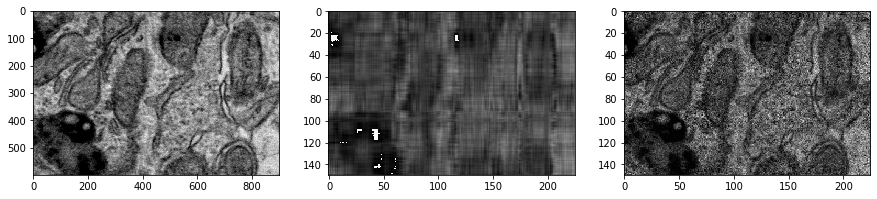

In [22]:
f, axarr = plt.subplots(1,3) # create visualizations
axarr[0].imshow(image, cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(compression(lrm, k = 8), cmap=plt.cm.gray) # visualize original image file
axarr[2].imshow(lrimage, cmap=plt.cm.gray)
plt.show() # show visualization

In [15]:
import numpy.linalg as LA
import math
import matplotlib.pyplot as plt

#load the pixels
m = np.array(image).astype(float)

def get_svd(m, plot=False):
    #get the matrix to compute V
    vm = np.dot(m.T,m)

    #singular values squared and eigenvectors v
    sigsq, vlist = LA.eigh(vm)

    #singular values and have them ordered from largest to smallest
    sig = sorted(np.array([math.sqrt(k) for k in sigsq if k > 0.001]), reverse = True)

    #arrange the singular values
    vlist = vlist.T
    vlist = vlist[::-1]

    #compute U through A*v = sig*u
    rank = len(sig)
    ulist = np.array([np.dot(m, vlist[i])/sig[i] for i in range(rank)])

    if plot:   #plot the values
        plt.plot(range(len(sig)), sig) 
        plt.xlabel('index')  
        plt.ylabel('Singular values')  
        plt.title('Figure 2') 
        plt.show() 

    return sig, vlist[:rank], ulist[:rank] # return positive singular values and corresponding vectors

In [16]:
m = np.array(image)

In [17]:
u, s, vh = np.linalg.svd(m)

In [40]:
sig, vlist, ulist = get_svd(m)

In [41]:
m.shape

(600, 900)

In [42]:
u.shape, s.shape, vh.shape

((600, 600), (600,), (900, 900))

In [44]:
ulist

array([[ 0.04217972,  0.04212478,  0.04244681, ...,  0.04106237,
         0.04041566,  0.04090444],
       [-0.01820232, -0.02014427, -0.01753168, ..., -0.01007701,
        -0.01702796, -0.01312955],
       [-0.02654149, -0.03022181, -0.03598504, ...,  0.06101242,
         0.06631215,  0.0581396 ],
       ...,
       [ 0.00102297, -0.00868086,  0.05426447, ..., -0.03764797,
         0.11022597,  0.0038043 ],
       [ 0.03815928, -0.05959992,  0.06430972, ..., -0.01985677,
         0.0204568 , -0.02919064],
       [ 0.06309555, -0.08463218,  0.01434151, ..., -0.02200789,
        -0.03471369,  0.02030099]])

In [46]:
ulist.shape, len(sig), vlist.shape

((600, 600), 600, (600, 900))

In [16]:
def compression(img, k = 0, compr_ratio = 0):
    sig, vlist, ulist = get_svd(img)# get positive singular values and corresponding vectors
    ulen = len(ulist)
    vlen = len(vlist)
    rank = len(sig)
    output = np.zeros(list(np.shape(img)))
    
    if compr_ratio: # If a compression ratio is given, compute k out of it
        k = math.floor(ulen*vlen / (1 + ulen + vlen) / compr_ratio)

    for i in range(k): #get a matrix out of each singular value
        cmpr = sig[i] * np.outer(ulist[i], vlist[i])
        output += cmpr

    output = output.astype(np.uint8)
    img = Image.fromarray(output, 'L')
    return img 
"""
If a parameter of compression ratio is given,
return the ratio of used singular vectors against total singular vectors.
"""

'\nIf a parameter of compression ratio is given,\nreturn the ratio of used singular vectors against total singular vectors.\n'

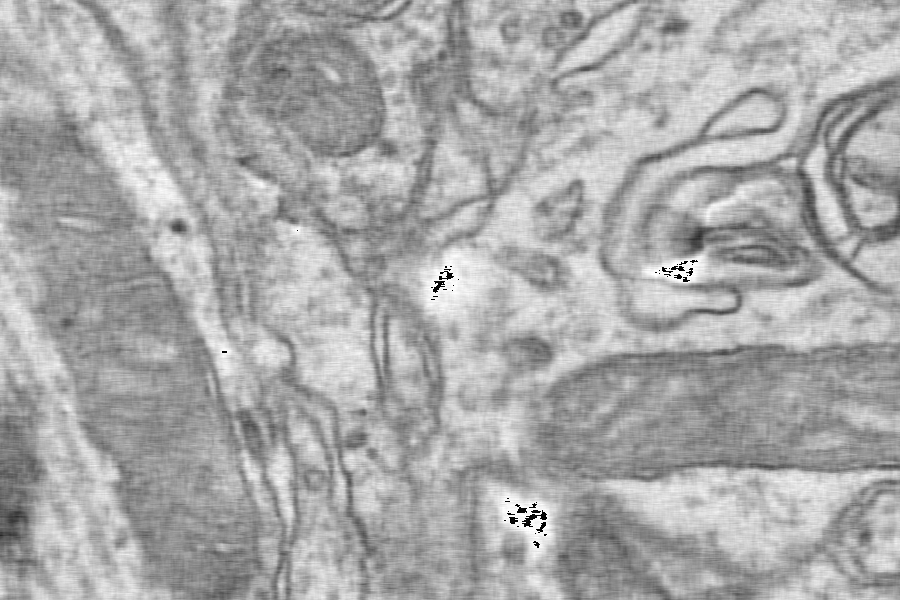

In [51]:
"""
k is the number of singular values. It's a keyword argument.
To change k, change the value in the equation without taking away 'k = '.
"""


----